In [1]:
%matplotlib inline
%run -im CaloDNN.ClassificationExperiment -- --NoAnalysis --NoTrain --cpu -L CaloDNN_512_2_Merged.1

Using CPU.
HyperParameter Scan:  20 possible combiniations.
______________________________________
ScanConfiguration
______________________________________
Picked combination:  0
Combo[0]={'Width': 32, 'Depth': 1}
Model Filename:  CaloDNN_32_1
______________________________________
Using PremixGenerator.

Using Theano backend.



Loading Model From: CaloDNN_512_2_Merged.1
Output Directory: TrainedModels/CaloDNN_512_2_Merged.1
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_1 (Flatten)              (1024, 15625)         0           flatten_input_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (1024, 15625)         0           flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_1 (Dense)                  (1024, 512)           8000512     activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (1024, 512)           0           dense_1[0][0]             

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


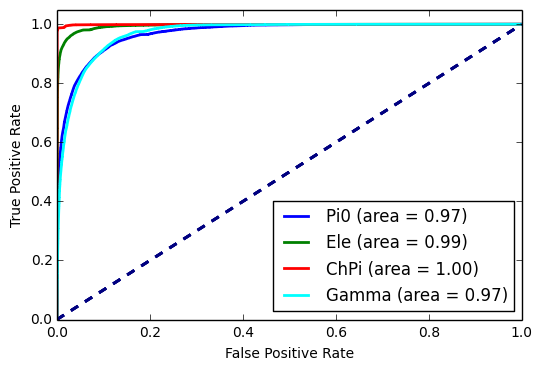

In [2]:
Test_genC.datasets+=["target"]
Test_genC.preprocessfunction=ConstantNormalization(Norms+[1.])
Test_genC.PreloadData()

Test_X_ECAL, Test_X_HCAL, Test_Y, target = tuple(Test_genC.D)

from CaloDNN.Analysis import MultiClassificationAnalysis
result,NewMetaData=MultiClassificationAnalysis(MyModel,[Test_X_ECAL,Test_X_HCAL],Test_Y,BatchSize,
                                                       IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})

In [3]:
import numpy as np

def BinData(Xs,Y,Ymin,Ymax,Ybins):
    out=[]
    Ystep=(Ymax-Ymin)/Ybins
    Ysample=np.arange(Ymin,Ymax,Ystep)
    for X in Xs+[Y]:
        Xout=[]
        for y in Ysample:
            Xout.append(X[np.where((Y>=y) & (Y<y+Ystep))])
        out.append(Xout)
    return out+[Ysample]
            
        

In [4]:
E_min,E_max,E_bins=10.,510.,50.
E_step=(E_max-E_min)/E_bins

Energy=target[:,:,2].flatten()
BD=BinData([Test_X_ECAL, Test_X_HCAL, Test_Y, result], Energy, E_min,E_max,E_bins )
E_binning=BD[-1]

In [5]:
BinnedResults={}
for i,E in enumerate(E_binning):
    tmp,NewMetaData=MultiClassificationAnalysis(MyModel,Test_Y=BD[2][i],result=BD[3][i],MakePlot=False,
                                                IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})
        
    for MD in NewMetaData:
        if MD in BinnedResults:
            BinnedResults[MD].append(NewMetaData[MD])
        else:
            BinnedResults[MD]=[NewMetaData[MD]]
    

/Library/Python/2.7/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


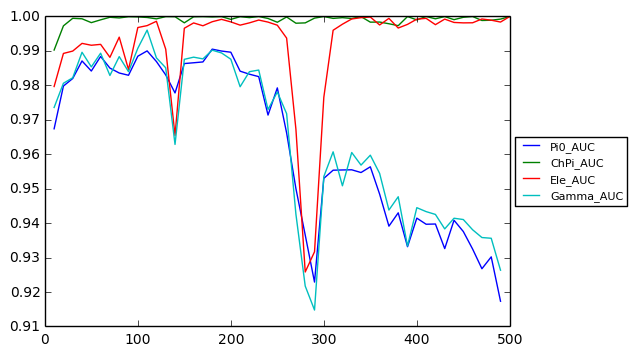

In [6]:
import matplotlib.pyplot as plt
for MD in BinnedResults:
    plt.plot(E_binning,BinnedResults[MD],label=MD)
plt.legend(loc="center left", bbox_to_anchor=(1, .5),fontsize=8)
